In [1]:
from scipy.io.wavfile import read

In [2]:
help(read)

Help on function read in module scipy.io.wavfile:

read(filename, mmap=False)
    Open a WAV file
    
    Return the sample rate (in samples/sec) and data from a WAV file.
    
    Parameters
    ----------
    filename : string or open file handle
        Input wav file.
    mmap : bool, optional
        Whether to read data as memory-mapped.
        Only to be used on real files (Default: False).
    
        .. versionadded:: 0.12.0
    
    Returns
    -------
    rate : int
        Sample rate of wav file.
    data : numpy array
        Data read from wav file.  Data-type is determined from the file;
        see Notes.
    
    Notes
    -----
    This function cannot read wav files with 24-bit data.
    
    Common data types: [1]_
    
    =====================  ===========  ===========  =============
         WAV format            Min          Max       NumPy dtype
    =====================  ===========  ===========  =============
    32-bit floating-point  -1.0         +1.0  

Read returns sample rate and data.

In [3]:
fs, x = read('space_cafe.wav')

In [4]:
fs

44100

The sample rate is 44100, which means ???

In [5]:
x

array([[ -77,  -10],
       [ -93,  -10],
       [ -93,  -12],
       ...,
       [2878, 1558],
       [2382,  827],
       [1636, -185]], dtype=int16)

In [6]:
x.size

438752

In [7]:
len(x)

219376

In [8]:
x.size/fs

9.949024943310658

In [9]:
len(x[0])

2

This clip is 9.94 seconds long.

In [10]:
import matplotlib.pyplot as plt

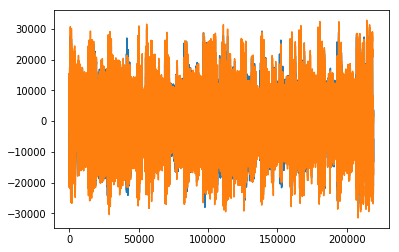

In [11]:
plt.plot(x)

In [12]:
import numpy as np

In [13]:
t = np.arange(x.size)/float(fs)
t

array([0.00000000e+00, 2.26757370e-05, 4.53514739e-05, ...,
       9.94895692e+00, 9.94897959e+00, 9.94900227e+00])

## OK somehow my x is 2D. Wonder why that happened?

ValueError: x and y must have same first dimension, but have shapes (438752,) and (219376, 2)

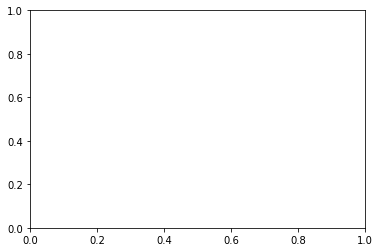

In [14]:
plt.plot(t, x)

WTF happened here..?

In [ ]:
spl1 = x[10000:10500]
spl2 = x[:7500]
spl3 = x[207800:]

In [ ]:
plt.plot(spl1)

In [15]:
plt.plot(spl2)

NameError: name 'spl2' is not defined

In [16]:
plt.plot(spl3)

NameError: name 'spl3' is not defined

In [17]:
plt.plot(spl1[:30])

NameError: name 'spl1' is not defined

### Apparently we have 2...

In [18]:
first = []
second = []
for i in x:
    first.append(i[0])
    second.append(i[1])

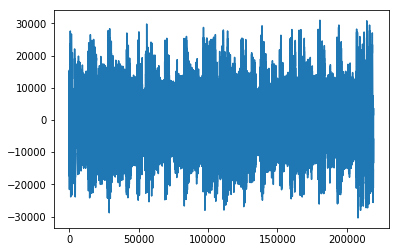

In [19]:
plt.plot(first)

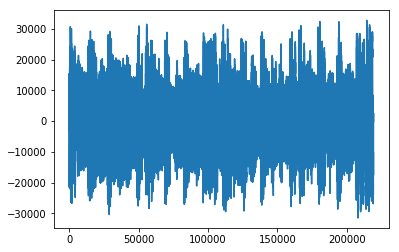

In [20]:
plt.plot(second)

# ...?

In [27]:
import wave
wav_file = wave.open('my.wav', 'w')

In [28]:
nchannels = 1
sampwidth = 2
nframes = len(x)
comptype = "NONE"
compname = "not compressed"
sample_rate = fs
wav_file.setparams((nchannels, sampwidth, sample_rate, nframes, comptype, compname))

In [29]:
for sample in x:
    wav_file.writeframes(struct.pack('h', int(sample * 32767.0)))
    

NameError: name 'struct' is not defined

In [30]:
wav_file.close()